# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_json (r'loan_data.json')
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [3]:
df.shape

(511, 10)

# Dataset Information

All the columns are object type except Credit_History.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


# 1. Find % of total applicants for each unique value of dependents

array(['0', '1', '2', '3+'], dtype=object)

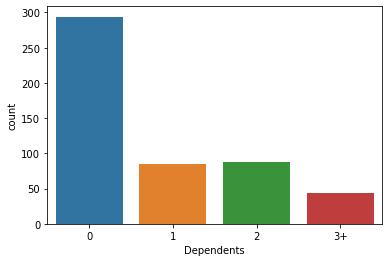

In [5]:
sns.countplot(df['Dependents'])
df['Dependents'].unique()

In [6]:
x=df['Dependents'].value_counts(dropna=False)
print(x)

0     294
2      88
1      85
3+     44
Name: Dependents, dtype: int64


value_counts gives the count of unique value
in a column and normalize returns the value
after division with number of columns    

In [7]:
Percentage_of_applicants = df['Dependents'].value_counts(normalize=True)*100
print(Percentage_of_applicants)

0     57.534247
2     17.221135
1     16.634051
3+     8.610568
Name: Dependents, dtype: float64


# 2. Find the average number of dependents per applicant

Assuming Dependents > 3(3+) as 3 and doing the type conversion

In [8]:
df['Dependents'] = df['Dependents'].replace('3+',3).astype(int)

In [9]:
avg_dependents = sum(df['Dependents'])/df.shape[0]

In [10]:
print("Average dependent per applicant: "+str(avg_dependents))

Average dependent per applicant: 0.7690802348336595


# 3. Find the %of applications approved for self-employed applicants

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

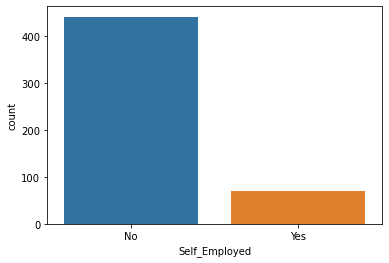

In [11]:
sns.countplot(df['Self_Employed'])

In [12]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


Number of self-employed applicants whose application has been approved.

In [13]:
self_employed_approved = df.query("Self_Employed == 'Yes' & Application_Status == 'Y'").count()
print(self_employed_approved)

Application_ID        46
Gender                46
Married               46
Dependents            46
Education             46
Self_Employed         46
Credit_History        46
Property_Area         46
Income                46
Application_Status    46
dtype: int64


In [14]:
self_employed_approved_per = self_employed_approved/df.shape[0]
print("Percentage of applications approved for self-employed applicants: "+str(self_employed_approved_per[0]*100))

Percentage of applications approved for self-employed applicants: 9.001956947162427


# 4. What is the % of rejections for married male applicants

In [16]:
married_male_not_approved = df.query("Married =='Yes' & Application_Status == 'N'").count()
print("Married Male with reject: " +str(married_male_not_approved[0]))
married_male_not_approved_per = married_male_not_approved/df.shape[0]
print("Percentage of applications rejected for married man: "+str(married_male_not_approved_per[0]*100))

Married Male with reject: 95
Percentage of applications rejected for married man: 18.590998043052835


# 5. Which property area has the maximum approval ratio

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

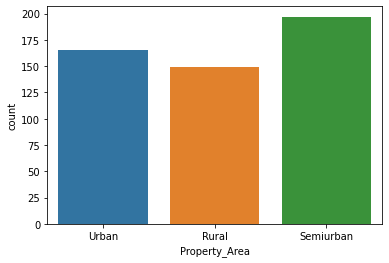

In [17]:
sns.countplot(df['Property_Area'])

In [18]:
No_of_urban_approved = df.query("Property_Area == 'Urban' & Application_Status == 'Y'").count()
No_of_rural_approved = df.query("Property_Area == 'Rural' & Application_Status == 'Y'").count()
No_of_semi_urban_approved = df.query("Property_Area == 'Semiurban' & Application_Status == 'Y'").count()
per_No_of_urban_approved = No_of_urban_approved/df.shape[0]
per_No_of_rural_approved = No_of_rural_approved/df.shape[0]
per_No_of_semi_urban_approved = No_of_semi_urban_approved/df.shape[0]
print("Percentage of applications approved for Urban Area: "+str(per_No_of_urban_approved[0]*100))
print("Percentage of applications approved for Rural Area: "+str(per_No_of_rural_approved[0]*100))
print("Percentage of applications approved for Semi-Urban Area: "+str(per_No_of_semi_urban_approved[0]*100))

Percentage of applications approved for Urban Area: 20.352250489236788
Percentage of applications approved for Rural Area: 17.61252446183953
Percentage of applications approved for Semi-Urban Area: 29.9412915851272


# 6. Find average dependents per income group

<AxesSubplot:xlabel='Income', ylabel='count'>

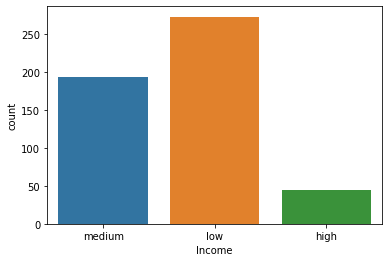

In [19]:
sns.countplot(df['Income'])

1st line queries number of dependent in a group
2nd line queries number of dependent in a group with zero dependent
3rd line queries number of dependent in a group with one dependent
4th line queries number of dependent in a group with two dependent
5th line queries number of dependent in a group with three+ dependent

for calculation i'm assuming 3+ as 3.
for dependent 1,2,3 we count the number of rows and multiple with respected dependent to get the total dependent for the group..

average for group = total/ no. of dependent in a group.

In [20]:
No_of_dependent_low = df.query("Income == 'low'").count()
No_of_dependent_low_0 = df.query("Income == 'low' & Dependents == '0'").count()
No_of_dependent_low_1 = df.query("Income == 'low' & Dependents == '1'").count()
No_of_dependent_low_2 = df.query("Income == 'low' & Dependents == '2'").count()
No_of_dependent_low_3 = df.query("Income == 'low' & Dependents == '3+'").count()
total = No_of_dependent_low_1[0] + (No_of_dependent_low_2[0]*2) + (No_of_dependent_low_3[0]*3)
print("Total: "+str(total))
print("Number of applicant with low Income: "+str(No_of_dependent_low[0]))
print("Average for Low Income: "+str(total/No_of_dependent_low[0]))

Total: 0
Number of applicant with low Income: 273
Average for Low Income: 0.0


In [21]:
No_of_dependent_medium = df.query("Income == 'medium'").count()
No_of_dependent_medium_0 = df.query("Income == 'medium' & Dependents == '0'").count()
No_of_dependent_medium_1 = df.query("Income == 'medium' & Dependents == '1'").count()
No_of_dependent_medium_2 = df.query("Income == 'medium' & Dependents == '2'").count()
No_of_dependent_medium_3 = df.query("Income == 'medium' & Dependents == '3+'").count()
total = No_of_dependent_medium_1[0] + (No_of_dependent_medium_2[0]*2) + (No_of_dependent_medium_3[0]*3)
print("Total: "+str(total))
print("Number of applicant with medium Income: "+str(No_of_dependent_medium[0]))
print("Average for medium Income: "+str(total/No_of_dependent_medium[0]))

Total: 0
Number of applicant with medium Income: 193
Average for medium Income: 0.0


In [22]:
No_of_dependent_high = df.query("Income == 'high'").count()
No_of_dependent_high_0 = df.query("Income == 'high' & Dependents == '0'").count()
No_of_dependent_high_1 = df.query("Income == 'high' & Dependents == '1'").count()
No_of_dependent_high_2 = df.query("Income == 'high' & Dependents == '2'").count()
No_of_dependent_high_3 = df.query("Income == 'high' & Dependents == '3+'").count()
total = No_of_dependent_high_1[0] + (No_of_dependent_high_2[0]*2) + (No_of_dependent_high_3[0]*3)
print("Total: "+str(total))
print("Number of applicant with high Income: "+str(No_of_dependent_high[0]))
print("Average for high Income: "+str(total/No_of_dependent_high[0]))

Total: 0
Number of applicant with high Income: 45
Average for high Income: 0.0


# 7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score

# Label Encoding

In [23]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [24]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['gender'] = lb_make.fit_transform(df['Gender'])
df['married'] = lb_make.fit_transform(df['Married'])
df['education'] = lb_make.fit_transform(df['Education'])
df['self_Employed'] = lb_make.fit_transform(df['Self_Employed'])
df['property_Area'] = lb_make.fit_transform(df['Property_Area'])
df['income'] = lb_make.fit_transform(df['Income'])
df['application_Status'] = lb_make.fit_transform(df['Application_Status'])
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status,gender,married,education,self_Employed,property_Area,income,application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y,1,0,0,0,2,2,1
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N,1,1,0,0,0,2,0
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y,1,1,0,1,2,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y,1,1,1,0,2,1,1
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y,1,0,0,0,2,2,1


In [25]:
cols = ['Application_ID','Gender','Married','Education','Self_Employed','Property_Area','Income','Application_Status']
df = df.drop(columns=cols, axis=1)
df.head()

,Dependents,Credit_History,gender,married,education,self_Employed,property_Area,income,application_Status
0,0,1,1,0,0,0,2,2,1
1,1,1,1,1,0,0,0,2,0
2,0,1,1,1,0,1,2,1,1
3,0,1,1,1,1,0,2,1,1
4,0,1,1,0,0,0,2,2,1


# Train-Test Split

In [26]:
# specify input and output attributes
X = df.drop(columns=['application_Status'], axis=1)
y = df['application_Status']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Model Training

In [28]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 83.59375
Cross validation is 80.81857985912812


In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 79.6875
Cross validation is 72.60803350466401


In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 81.25
Cross validation is 72.60803350466401


In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 78.90625
Cross validation is 76.52008376165999


In [33]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 79.6875
Cross validation is 74.5669141442985


# Hyperparameter tuning

In [34]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=15, max_features=1)
classify(model, X, y)

Accuracy is 83.59375
Cross validation is 80.62250142775558


In [35]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 19],
       [ 9, 76]], dtype=int64)

<AxesSubplot:>

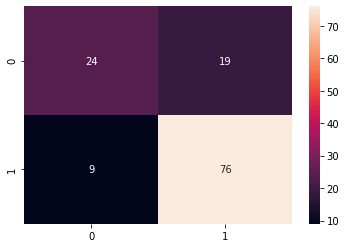

In [37]:
sns.heatmap(cm, annot=True)